In [2]:
import gmaps
import numpy as np
import pandas as pd
from shapely.geometry import Point, Polygon
import geopandas as gpd
import requests
import json
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
#E%matplotlib inline

In [2]:
# from IPython.core.display import display, HTML
# display(HTML("<style>.container { width:95% !important; }</style>"))
# ! jt -t grade3

In [3]:
rawlistingdf = pd.read_csv("../ShareEconomyEnlightenment/Resources/Airbnb_Texas_Rentals.csv")
rawlistingdf.head(2)

,id,average_rate_per_night,bedrooms_count,city,date_of_listing,description,latitude,longitude,title,url
0,1,$27,2,Humble,May-16,Welcome to stay in private room with queen bed...,30.020138,-95.293996,2 Private rooms/bathroom 10min from IAH airport,https://www.airbnb.com/rooms/18520444?location...
1,2,$149,4,San Antonio,Nov-10,"Stylish, fully remodeled home in upscale NW – ...",29.503068,-98.447688,Unique Location! Alamo Heights - Designer Insp...,https://www.airbnb.com/rooms/17481455?location...


In [4]:
listingdf = pd.read_csv("../ShareEconomyEnlightenment/Resources/Airbnb_Texas_Rentals_address_FULL.csv")
listingdf.head(2)

,Unnamed: 0,id,City,Address,lat,lon
0,1,4,Bryan,"775, Inwood Drive, Bryan, Brazos County, Texas...",30.637304,-96.337846
1,2,6,Conroe,"9163, Red Stag, Montgomery County, Texas, 7730...",30.370455,-95.385319


In [5]:
df = pd.read_csv("../ShareEconomyEnlightenment/Resources/Airbnb_Texas_Rentals_WalkScores.csv")
df.head(2)

,Unnamed: 0,id,WalkScore,description
0,1,4,30,Car-Dependent
1,2,6,0,Car-Dependent


In [6]:
dfMap = df.merge(listingdf, on='id')
dfMapPrice = dfMap.merge(rawlistingdf, on='id')
dfMapPrice

,Unnamed: 0_x,id,WalkScore,description_x,Unnamed: 0_y,City,Address,lat,lon,average_rate_per_night,bedrooms_count,city,date_of_listing,description_y,latitude,longitude,title,url
0,1,4,30,Car-Dependent,1,Bryan,"775, Inwood Drive, Bryan, Brazos County, Texas...",30.637304,-96.337846,$60,1,Bryan,Feb-16,Private bedroom in a cute little home situated...,30.637304,-96.337846,Private Room Close to Campus,https://www.airbnb.com/rooms/11839729?location...
1,2,6,0,Car-Dependent,2,Conroe,"9163, Red Stag, Montgomery County, Texas, 7730...",30.370455,-95.385319,$250,4,Conroe,Aug-16,"My place is close to Lake Conroe, family-frien...",30.370455,-95.385319,Gorgeous Home with Country Setting,https://www.airbnb.com/rooms/14466133?location...
2,3,8,14,Car-Dependent,3,Fort Worth,"4974, Glen Eden Drive, Fort Worth, Tarrant Cou...",32.689611,-97.298161,$25,1,Fort Worth,Jan-16,This is a beautiful bedroom with a queen size ...,32.689611,-97.298161,Friendly Private Room in َQuiet Neighborhood,https://www.airbnb.com/rooms/18977363?location...
3,4,9,7,Car-Dependent,4,Rockport,"North Fulton Beach Road, Copano Village, Arans...",28.103726,-97.025832,$345,3,Rockport,Feb-16,First class and comfortable condo with the bes...,28.103726,-97.025832,608 - Bayfront Condos,https://www.airbnb.com/rooms/17559848?location...
4,5,11,39,Car-Dependent,5,Irving,"3841, Cheyenne Street, Irving, Dallas County, ...",32.862116,-97.002643,$65,1,Irving,Jul-15,My cool and comfortable bedroom apartment feel...,32.862116,-97.002643,Cozy 1 bedroom/bathroom with pool,https://www.airbnb.com/rooms/7276294?location=...
5,6,13,0,Car-Dependent,6,Round Mountain,"Nicholson Bluff Cv, Travis County, Texas, USA",30.352005,-98.146242,$160,2,Round Mountain,Aug-12,Our place combines the convenience for visitin...,30.352005,-98.146242,Cypress Creek Retreat Hamilton Pool,https://www.airbnb.com/rooms/658762?location=C...
6,7,15,15,Car-Dependent,7,Kerrville,"699, Methodist Encampment Road, Kerrville, Ker...",30.073667,-99.161365,$175,2,Kerrville,Aug-16,My place is close to downtown Kerrville. Beaut...,30.073667,-99.161365,"Cozy cottage charm,right in Kerrville!",https://www.airbnb.com/rooms/14694333?location...
7,8,17,81,Very Walkable,8,Austin,"F T and Belle Ramsey House, Avenue B, Hyde Par...",30.309522,-97.731710,$82,2,Austin,Dec-15,"Cute two bedroom with lots of windows, sunny b...",30.309522,-97.731710,Cosy 2 Bedroom in Hyde Park!,https://www.airbnb.com/rooms/18550276?location...
8,9,18,21,Car-Dependent,9,Port Aransas,"800, Sandcastle Drive, Port Aransas, Aransas C...",27.817176,-97.068090,$275,1,Port Aransas,Feb-17,"My place is close to the beach, restaurants an...",27.817176,-97.068090,Ocean Getaway with Magnificent Views,https://www.airbnb.com/rooms/17402254?location...
9,10,19,6,Car-Dependent,10,Houston,"13009, Sweetgum Shores Drive, Harmaston, Harri...",29.954680,-95.176070,"$1,500",4,Houston,Jan-17,4 bedroom 2 bathroom home with an open floor p...,29.954680,-95.176070,Super Bowl 2017 4 BDRM Home Retreat,https://www.airbnb.com/rooms/16964526?location...


In [7]:
dfGraphWSPrice = dfMapPrice[['average_rate_per_night','WalkScore']]

In [8]:
dfGraphWSPrice = dfGraphWSPrice[dfGraphWSPrice.columns[0:]].replace('[\$,]', '', regex=True).astype(float)


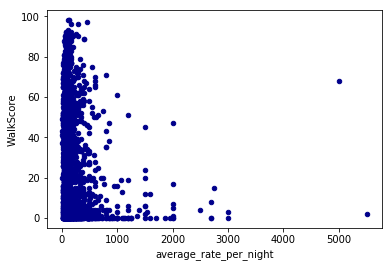

In [9]:
ax1 = dfGraphWSPrice.plot.scatter(x='average_rate_per_night', y='WalkScore', c='DarkBlue')
#styling
plt.show()

In [10]:
dfGroup = dfMapPrice[['id','description_x']]

In [11]:
dfDesc = dfGroup.groupby(['description_x']).count()

In [12]:
dfDesc = dfDesc.reset_index()

<Figure size 432x288 with 0 Axes>

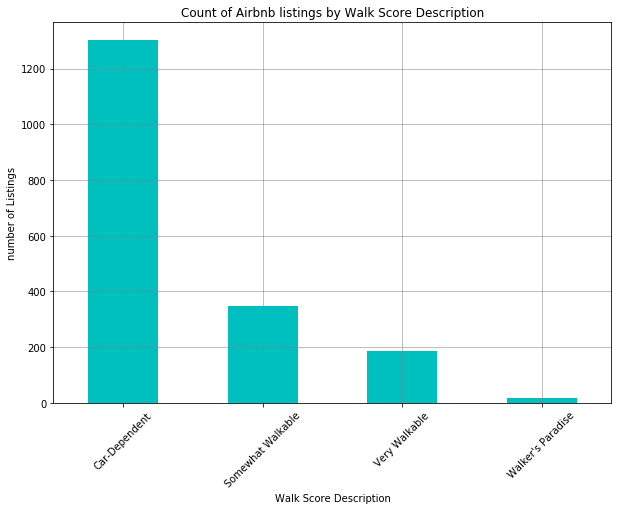

<Figure size 720x504 with 0 Axes>

In [13]:
%matplotlib inline 
plt.figure()
plt.rcParams['figure.figsize'] = [10, 7]
ax2 = dfDesc.plot.bar(x='description_x', y='id', color='c', rot=45)
plt.title("Count of Airbnb listings by Walk Score Description")
plt.xlabel("Walk Score Description")
plt.ylabel("number of Listings")
ax2.get_legend().remove()
# Show the plot
plt.grid(color='gray', linestyle='-', linewidth=.5)
plt.show()
# Set a Title and labels
plt.show()
# Save Figure
# fig = plt.scatter[0].get_figure()
fig = plt.gcf()
# fig.set_size_inches(4, 4)
# plt.savefig('WalkScoreCount.png')

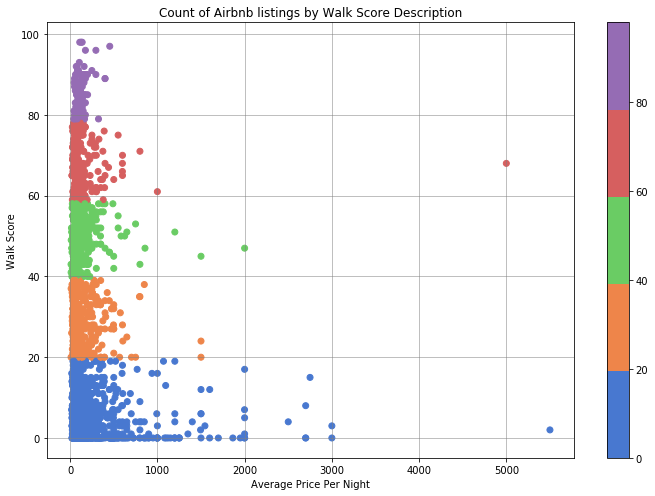

In [14]:
current_palette = sns.color_palette("muted", n_colors=5)
cmap = ListedColormap(sns.color_palette(current_palette).as_hex())
plt.figure()
# xAxis = np.arange(len(dfGraphWSPrice))
# tick_locations = [value+100 for value in xAxis]
# tickLocations = [100,200,300,400,500,600]
plt.rcParams['figure.figsize'] = [10, 7]
# Define a variable N
N = 1852
# colors = np.random.randint(0,100,N)
colors = dfGraphWSPrice['WalkScore']

# Create a scatter plot
plt.scatter(y='WalkScore', x='average_rate_per_night', data=dfGraphWSPrice, c=colors, cmap=cmap)
# plt.xticks(tick_locations, dfGraphWSPrice["average_rate_per_night"], rotation="vertical")
# Add a color bar
plt.title("Count of Airbnb listings by Walk Score Description")
plt.xlabel("Average Price Per Night")
plt.ylabel("Walk Score")
plt.grid(color='gray', linestyle='-', linewidth=.5)
plt.colorbar()
plt.tight_layout()
# Show the plot

plt.show()

# plt.savefig('WalkScoreDesc.png')